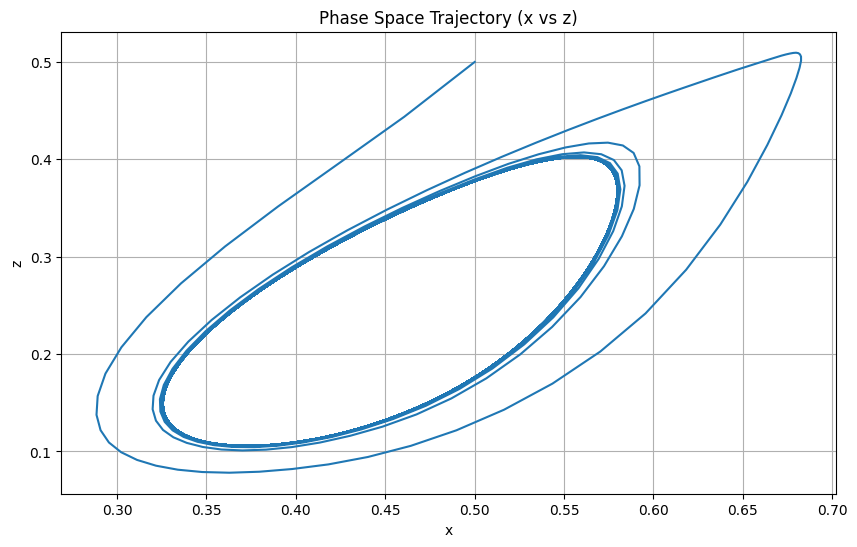

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

R = 3.0
p = 1.05
c = 0.2

d = c/p
x0 = 0.5
z0 = 0.5
y0 = [x0, z0]

t_span = (0.0, 5000.0)        
t_eval = np.linspace(*t_span, 10000)  

def sys(t, y, p, c, R):
    x, z = y

    dx = p*(1 - z)*(1 - x)*(x**2) - p*(1 + z)*x*((1 - x)**2) + c*(1 - z)*(1 - x)
    dz = R * x * z * (1 - z) - z
    return [dx, dz]

sol = solve_ivp(sys, t_span, y0, args=(p, c, R), t_eval=t_eval, method='RK45')

x = sol.y[0]
z = sol.y[1]

plt.figure(figsize=(10, 6))
plt.plot(x, z, label='Trajectory')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Phase Space Trajectory (x vs z)')
plt.grid()

plt.show()


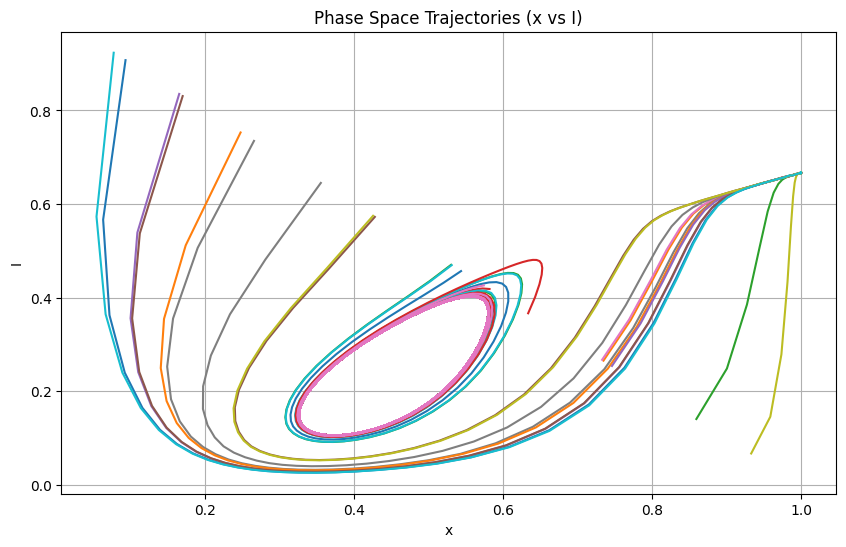

In [12]:
initial_conditions = np.random.dirichlet([1, 1], size=20)

plt.figure(figsize=(10, 6))
for ic in initial_conditions:
    sol = solve_ivp(sys, t_span, ic, t_eval=t_eval, args=(p, c, R))
    plt.plot(sol.y[0],  sol.y[1], label=f'IC: {ic}')

plt.xlabel('x')
plt.ylabel('I')
plt.title('Phase Space Trajectories (x vs I)')
plt.grid()
plt.show()

In [13]:
def dfe(R, d):
   x_all= np.roots([-2*R,2*R,-1,d])
   real_roots = [x.real for x in x_all if np.isreal(x) and 0 <= x.real <= 1]
   x_all = np.array(real_roots)
   return x_all

# Find and print the disease-free equilibria
dfe_points = dfe(R, d)
print("Disease-Free Equilibria (x values):", dfe_points)


Disease-Free Equilibria (x values): [0.84754806]


In [14]:
def Jacobian(x, I, p, c, R):
    dfdx = p*(1 - I)*(2*x - 3*x**2) - p*(1 + I)*((1 - x)**2 - 2*x*(1 - x)) - c*(1 - I)
    dfdI = -p*(1 - x)*(x**2) - p*x*((1 - x)**2) - c*(1 - x)
    dgdX = R * I * (1 - I)
    dgdI = R * x * (1 - 2*I) - 1
    return np.array([[dfdx, dfdI],
                     [dgdX, dgdI]])
def trace(x, I, p, c, R):
    J = Jacobian(x, I, p, c, R)
    return np.trace(J)

def det(x, I, p, c, R):
    J = Jacobian(x, I, p, c, R)
    return np.linalg.det(J)

def Eigenvalues(x, I, p, c, R):
    J = Jacobian(x, I, p, c, R)
    return np.linalg.eigvals(J)


In [15]:
def underroot(x, I, p, c, R):
    tr = trace(x, I, p, c, R)
    detJ = det(x, I, p, c, R)
    return tr**2 - 4*detJ


In [16]:
# heatmap of underroot values for R and c values
R_values = np.linspace(0, 10, 200)
c_values = np.linspace(0, 5, 200)
U = np.zeros((len(R_values), len(c_values)))
for i, R in enumerate(R_values):
    for j, c in enumerate(c_values):
        U[i, j] = underroot(X, I, p, c, R)
plt.figure(figsize=(10, 6))
plt.contourf(c_values, R_values, U, levels=50, cmap='viridis')
plt.colorbar(label='Underroot Value')
plt.xlabel('c values')
plt.ylabel('R values')
plt.title('Heatmap of Underroot Values for Varying R and c')
plt.show()

NameError: name 'X' is not defined

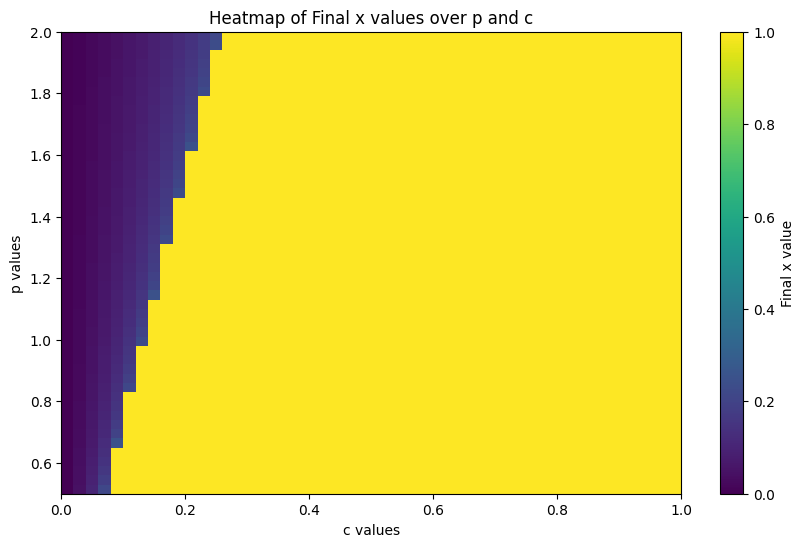

In [ ]:
# heatmap
p_values = np.linspace(0.5, 2.0, 50)
c_values = np.linspace(0.0, 1.0, 50)
final_x = np.zeros((len(p_values), len(c_values)))

for i, p in enumerate(p_values):
    for j, c in enumerate(c_values):
        sol = solve_ivp(sys, t_span, y0, t_eval=t_eval, args=(p, c, R))
        final_x[i, j] = sol.y[0, -1]
plt.figure(figsize=(10, 6))
plt.imshow(final_x, extent=(c_values[0], c_values[-1], p_values[0], p_values[-1]), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Final x value')
plt.xlabel('c values')
plt.ylabel('p values')
plt.title('Heatmap of Final x values over p and c')
plt.show()

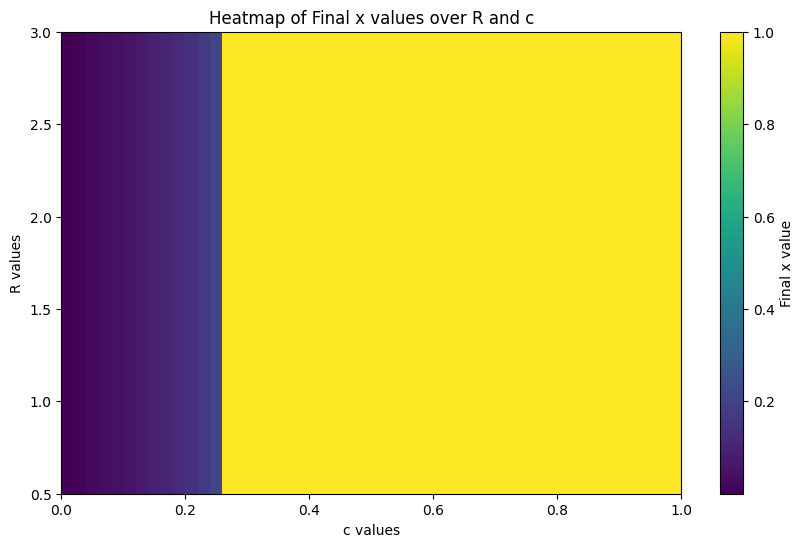

In [ ]:
R_values = np.linspace(0.5, 3.0, 50)
c_values = np.linspace(0.0, 1.0, 50)
final_x = np.zeros((len(R_values), len(c_values)))

for i, R in enumerate(R_values):
    for j, c in enumerate(c_values):
        sol = solve_ivp(sys, t_span, y0, t_eval=t_eval, args=(p, c, R))
        final_x[i, j] = sol.y[0, -1]
plt.figure(figsize=(10, 6))
plt.imshow(final_x, extent=(c_values[0], c_values[-1], R_values[0], R_values[-1]), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Final x value')
plt.xlabel('c values')
plt.ylabel('R values')
plt.title('Heatmap of Final x values over R and c')
plt.show()

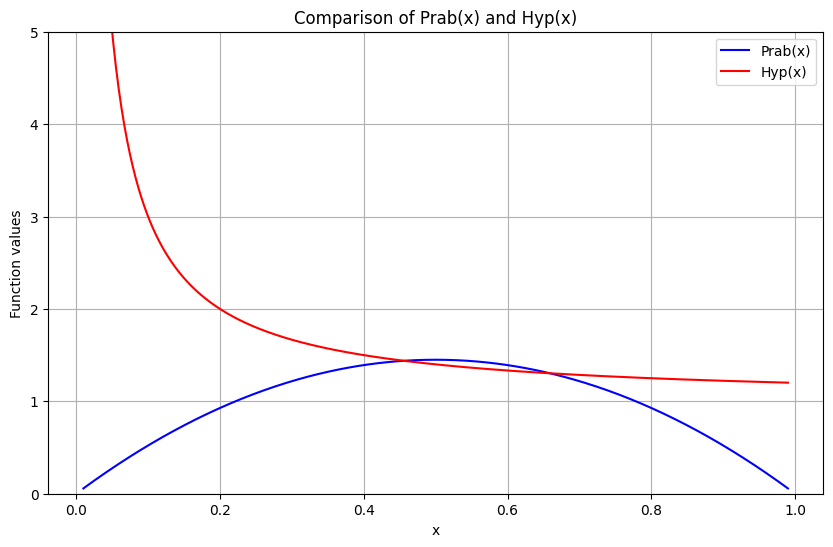

In [ ]:
d = c/p

def prab(x):
    return 2 * R * x * (1-x)

def hyp(x):
    return d / x + 1

plt.figure(figsize=(10, 6))
x_vals = np.linspace(0.01, 0.99, 500)
plt.plot(x_vals, prab(x_vals), label='Prab(x)', color='blue')
plt.plot(x_vals, hyp(x_vals), label='Hyp(x)', color='red')
plt.ylim(0, 5)
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Comparison of Prab(x) and Hyp(x)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
def f(x):
    return prab(x) - hyp(x)    

Intersection found for d=0.1, R=2.4081632653061225, f_values=-1.0533284683570396
Intersection found for d=0.1, R=2.4673469387755103, f_values=-1.0521566316223459
Intersection found for d=0.1, R=2.526530612244898, f_values=-1.050984794887652
Intersection found for d=0.1, R=2.5857142857142854, f_values=-1.049812958152958
Intersection found for d=0.1, R=2.644897959183673, f_values=-1.0486411214182643
Intersection found for d=0.1, R=2.704081632653061, f_values=-1.0474692846835703
Intersection found for d=0.1, R=2.763265306122449, f_values=-1.0462974479488765
Intersection found for d=0.1, R=2.8224489795918366, f_values=-1.0451256112141827
Intersection found for d=0.1, R=2.8816326530612244, f_values=-1.0439537744794887
Intersection found for d=0.1, R=2.940816326530612, f_values=-1.0427819377447949
Intersection found for d=0.1, R=3.0, f_values=-1.0416101010101009
Intersection found for d=0.13877551020408163, R=2.5857142857142854, f_values=-1.088980140177283
Intersection found for d=0.13877551

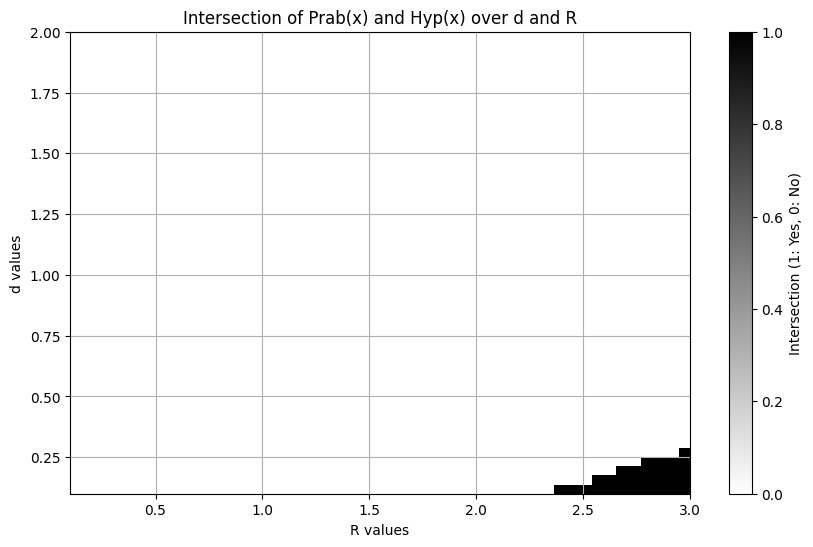

In [ ]:
# plot heatmap for d vs R for which prab and hyp intersect
d_values = np.linspace(0.1, 2.0, 50)
R_values = np.linspace(0.1, 3.0, 50)
intersection_matrix = np.zeros((len(d_values), len(R_values)))

for i, d in enumerate(d_values):
    for j, R in enumerate(R_values):
        x_test = np.linspace(0.01, 0.99, 100)
        f_values = f(x_test)
        if np.any(f_values[:-1] * f_values[1:] < 0):
            intersection_matrix[i, j] = 1
            print(f"Intersection found for d={d}, R={R}, f_values={f_values[-1]}")
            
plt.figure(figsize=(10, 6))
plt.imshow(intersection_matrix, extent=(R_values[0], R_values[-1], d_values[0], d_values[-1]), origin='lower', aspect='auto', cmap='gray_r')
plt.colorbar(label='Intersection (1: Yes, 0: No)')
plt.xlabel('R values')
plt.ylabel('d values')
plt.title('Intersection of Prab(x) and Hyp(x) over d and R')
plt.grid()
plt.show()